In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pip install geopandas

In [4]:
pip install lonboard

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 884.2/884.2 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.7/213.7 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.4/727.4 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.8 MB/s eta 0:00:00


In [5]:
import zipfile
import os
import numpy as np
import pandas as pd
import geopandas as gpd
from sklearn.cluster import KMeans, DBSCAN
import shapely
import folium
from lonboard import Map, ScatterplotLayer
import folium
import geopandas as gpd
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

Figure 6 Graph 2:

In [14]:
woodland_geo = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Data/woodland')

In [15]:
woodland_geo.head()

,OBJECTID_1,SCPTDATA_I,PAWS_SURVY,TYPE,CANOPY_PCT,NATIVE_PCT,DOM_HABITA,DOM_HB_PCT,SEMINT_PCT,STRUCT_NUM,MATURITY,DOM_STRUCT,HERBIVORE,ER_NAT_PCT,OTHR_TRAIT,HECTARES,INVASV_PCT,INVASV_NUM,geometry
0,1001,950275008,Yes,Native woodland,70,65,Lowland mixed deciduous woodland,90,100,5,Young,Pole immature,Medium,75,Yes,2.714120,0,0,"POLYGON ((-305180.316 7537690.925, -305218.504..."
1,1002,950242466,No,Native woodland,70,80,Upland birchwood,90,100,5,Regenerating,Established regeneration,Medium,73,Yes,1.752670,0,1,"POLYGON ((-499209.822 7535603.393, -499209.485..."
2,1003,950242470,No,Nearly-native woodland,80,45,Lowland mixed deciduous woodland,70,100,5,Mature,Mature,High,0,Yes,4.464750,0,0,"POLYGON ((-507132.21 7537207.043, -507115.869 ..."
3,1004,3277,No,Native woodland,90,100,Upland birchwood,100,100,3,Young,Pole immature,Low,100,No,0.941447,0,0,"POLYGON ((-496009.371 7439798.258, -495990.436..."
4,1005,3278,No,Native woodland,80,95,Wet woodland,100,100,3,Mature,Mature,Low,0,No,2.540060,0,0,"POLYGON ((-490531.588 7443332.367, -490543.181..."


In [16]:
woodland_geo_filtered = woodland_geo[woodland_geo['HERBIVORE'] == 'Very High']

In [17]:
woodland_geo_filtered.head()

,OBJECTID_1,SCPTDATA_I,PAWS_SURVY,TYPE,CANOPY_PCT,NATIVE_PCT,DOM_HABITA,DOM_HB_PCT,SEMINT_PCT,STRUCT_NUM,MATURITY,DOM_STRUCT,HERBIVORE,ER_NAT_PCT,OTHR_TRAIT,HECTARES,INVASV_PCT,INVASV_NUM,geometry
30,1031,950203387,No,Native woodland,70,55,Lowland mixed deciduous woodland,70,100,4,Mixed,Mature,Very High,100,Yes,1.003970,0,0,"POLYGON ((-503411.703 7536763.848, -503411.776..."
39,1040,950172480,No,Native woodland,70,65,Unidentifiable type,100,100,3,Young,Pole immature,Very High,100,Yes,0.723536,0,0,"POLYGON ((-497824.765 7330460.838, -497824.49 ..."
63,1064,950131001,No,Native woodland,20,90,Wet woodland,90,0,2,Regenerating,Established regeneration,Very High,100,No,1.430830,0,0,"POLYGON ((-549388.928 7363199.024, -549374.887..."
70,1071,950149410,No,Native woodland,70,90,Lowland mixed deciduous woodland,80,10,4,Young,Pole immature,Very High,100,Yes,3.524570,0,0,"POLYGON ((-321714.05 7531060.338, -321712.753 ..."
74,1075,950203355,No,Native woodland,70,55,Lowland mixed deciduous woodland,60,100,4,Mature,Mature,Very High,100,Yes,0.568946,0,0,"POLYGON ((-498435.1 7533720.929, -498420.701 7..."


In [18]:
pip install geopandas contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 71.5 MB/s eta 0:00:00


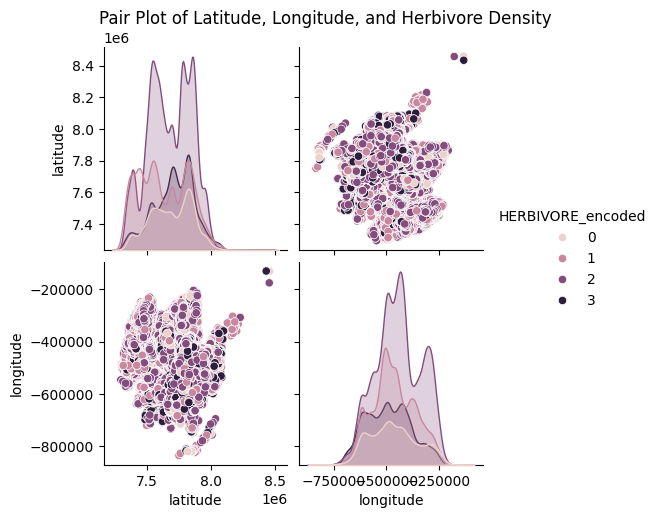

In [19]:
woodland_geo['centroid'] = woodland_geo.geometry.centroid
woodland_geo['latitude'] = woodland_geo['centroid'].y
woodland_geo['longitude'] = woodland_geo['centroid'].x

label_encoder = LabelEncoder()
woodland_geo['HERBIVORE_encoded'] = label_encoder.fit_transform(woodland_geo['HERBIVORE'])

data = woodland_geo[['latitude', 'longitude', 'HERBIVORE_encoded']]

sns.pairplot(data, diag_kind='kde', hue='HERBIVORE_encoded', markers='o')
plt.suptitle('Pair Plot of Latitude, Longitude, and Herbivore Density', y=1.02)
plt.show()

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

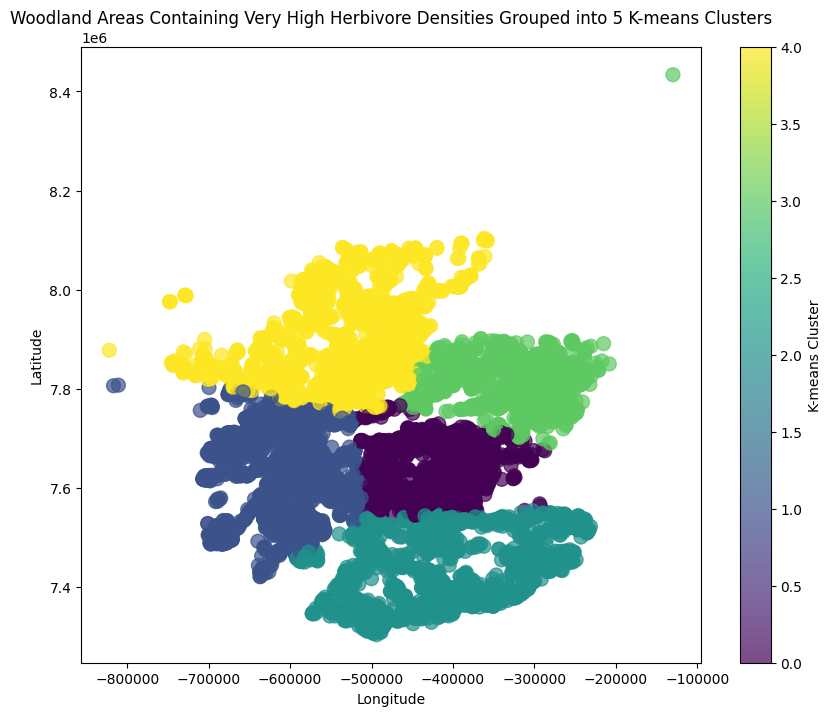

In [20]:
woodland_geo_filtered['centroid'] = woodland_geo_filtered.geometry.centroid
woodland_geo_filtered['latitude'] = woodland_geo_filtered['centroid'].y
woodland_geo_filtered['longitude'] = woodland_geo_filtered['centroid'].x

kmeans = KMeans(n_clusters=5, random_state=42)
woodland_geo_filtered['kmeans_cluster'] = kmeans.fit_predict(woodland_geo_filtered[['latitude', 'longitude']])

fig, ax = plt.subplots(figsize=(10, 8))

scatter = ax.scatter(
    woodland_geo_filtered['longitude'],
    woodland_geo_filtered['latitude'],
    c=woodland_geo_filtered['kmeans_cluster'],
    cmap='viridis',
    s=100,
    alpha=0.7,
)

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('K-means Cluster')

plt.title('Woodland Areas Containing Very High Herbivore Densities Grouped into 5 K-means Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Figure 6 Graph 1:

In [21]:
forest_geo = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Data/forest')

In [22]:
forest_geo.head()

,OBJECTID_1,CATEGORY,IFT_IOA,COUNTRY,Area_ha,RasterID,geometry
0,18246,Woodland,Assumed woodland,Scotland,0.376911,1,"POLYGON ((213154.392 532692.536, 213145.137 53..."
1,18247,Woodland,Assumed woodland,Scotland,0.330884,1,"POLYGON ((212954.8 533213.77, 212960.877 53321..."
2,18248,Woodland,Assumed woodland,Scotland,15.571288,1,"POLYGON ((246363.245 534713.076, 246368.03 534..."
3,18249,Woodland,Assumed woodland,Scotland,6.287636,1,"POLYGON ((246482.75 535801.522, 246463.02 5357..."
4,18250,Woodland,Assumed woodland,Scotland,2.507675,1,"POLYGON ((239562.77 538746.058, 239543.85 5387..."


In [23]:
forest_geo_filtered = forest_geo[forest_geo['Area_ha'] >= 200]

In [24]:
forest_geo_filtered.head()

,OBJECTID_1,CATEGORY,IFT_IOA,COUNTRY,Area_ha,RasterID,geometry
1895,20141,Woodland,Assumed woodland,Scotland,380.246490,1,"POLYGON ((355311.671 593363.87, 355305.543 593..."
2151,20397,Woodland,Assumed woodland,Scotland,456.833352,1,"POLYGON ((345231.469 600640.812, 345210.813 60..."
2185,20431,Woodland,Assumed woodland,Scotland,475.510058,1,"POLYGON ((356299.332 602233.682, 356305.619 60..."
2735,20981,Woodland,Assumed woodland,Scotland,242.159174,1,"POLYGON ((319914.213 611895.062, 319949.202 61..."
2936,21182,Woodland,Assumed woodland,Scotland,548.860222,1,"POLYGON ((310580.838 613153.533, 310581.46 613..."


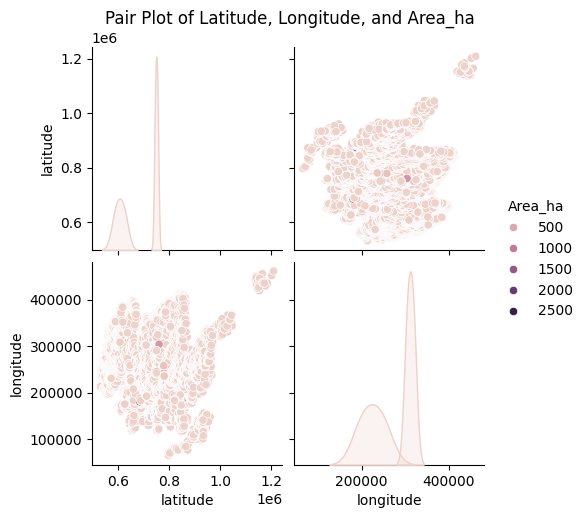

In [25]:
forest_geo['centroid'] = forest_geo.geometry.centroid
forest_geo['latitude'] = forest_geo['centroid'].y
forest_geo['longitude'] = forest_geo['centroid'].x

data = forest_geo[['latitude', 'longitude', 'Area_ha']]

sns.pairplot(data, diag_kind='kde', hue='Area_ha', markers='o')
plt.suptitle('Pair Plot of Latitude, Longitude, and Area_ha', y=1.02)
plt.show()

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

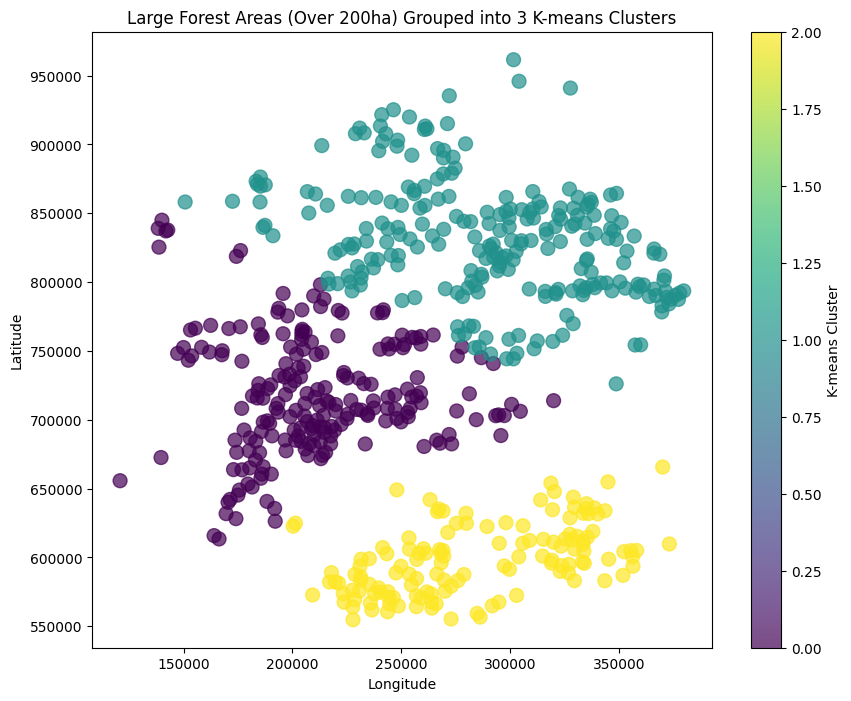

In [26]:
forest_geo_filtered['centroid'] = forest_geo_filtered.geometry.centroid
forest_geo_filtered['latitude'] = forest_geo_filtered['centroid'].y
forest_geo_filtered['longitude'] = forest_geo_filtered['centroid'].x

kmeans = KMeans(n_clusters=3, random_state=42)
forest_geo_filtered['kmeans_cluster'] = kmeans.fit_predict(forest_geo_filtered[['latitude', 'longitude']])

fig, ax = plt.subplots(figsize=(10, 8))

scatter = ax.scatter(
    forest_geo_filtered['longitude'],
    forest_geo_filtered['latitude'],
    c=forest_geo_filtered['kmeans_cluster'],
    cmap='viridis',
    s=100,
    alpha=0.7,
)

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('K-means Cluster')

plt.title('Large Forest Areas (Over 200ha) Grouped into 3 K-means Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Figure 7:

In [27]:
pop_geo = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Data/Scotland')

In [28]:
pop_geo.head()

,FID_1,GSS_CODEWD,WD_Name,GSS_CODECA,CA_Name,X,Y,Count_,Avg_Obesit,Area,...,NoCar,Over49Hou,NSSEC1,NSSEC2,LTUnemp,Males,Disability,Overcrowdi,NoQual,geometry
0,0,S13002487,Torry/Ferryhill,S12000033,Aberdeen_City,396136.888128,805126.474407,3,12.356667,S13002487,...,39.841270,12.246460,31.792717,28.509804,3.775910,51.262269,6.587537,0.661376,19.654756,"POLYGON ((399055.9 804360.9, 396627.1 804437.1..."
1,1,S13002476,Dyce/Bucksburn/Danestone,S12000033,Aberdeen_City,387038.138533,811833.102588,4,10.400000,S13002476,...,17.713612,13.056719,31.725482,27.939027,2.088119,49.069092,7.748601,0.271067,25.009362,"POLYGON ((383626.4 816019.5, 383644.9 816005.5..."
2,2,S13002484,Lower Deeside,S12000033,Aberdeen_City,384561.096883,802904.278934,3,4.136667,S13002484,...,9.757762,17.700189,48.344309,14.544105,2.801224,48.789758,6.014536,0.204708,13.984213,"POLYGON ((390254.3 804350, 390255.7 804348.1, ..."
3,3,S13002485,Hazlehead/Ashley/Queens Cross,S12000033,Aberdeen_City,390276.477994,805418.078359,5,6.940000,S13002485,...,19.598714,16.406555,51.583838,12.832606,2.062509,49.842052,5.305991,0.121938,11.332667,"POLYGON ((390254.3 804350, 390253.5 804349.9, ..."
4,4,S13002478,Kingswells/Sheddocksley,S12000033,Aberdeen_City,387409.288544,807399.607298,0,0.000000,S13002478,...,26.417979,11.961165,30.803900,30.141648,3.476821,47.925532,8.736702,0.382205,25.526621,"POLYGON ((389693.8 808762.5, 389695.4 808753.3..."


In [29]:
pop_geo_filtered = pop_geo[['CA_Name', 'Density']]

In [30]:
pop_geo_filtered.head()

,CA_Name,Density
0,Aberdeen_City,43.61
1,Aberdeen_City,3.38
2,Aberdeen_City,3.44
3,Aberdeen_City,33.07
4,Aberdeen_City,6.60


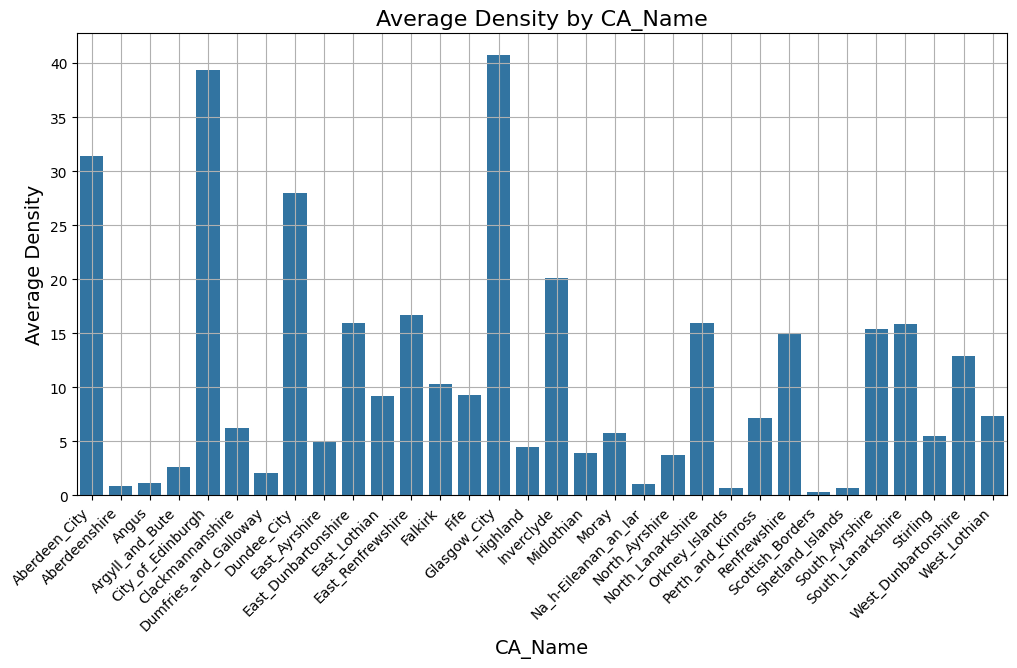

In [31]:
avg_density_by_ca = pop_geo_filtered.groupby('CA_Name')['Density'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='CA_Name', y='Density', data=avg_density_by_ca)

plt.title('Average Density by CA_Name', fontsize=16)
plt.xlabel('CA_Name', fontsize=14)
plt.ylabel('Average Density', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

In [32]:
unique_ca_names = pop_geo['CA_Name'].unique()
print(unique_ca_names)

['Aberdeen_City' 'Aberdeenshire' 'Angus' 'Argyll_and_Bute'
 'City_of_Edinburgh' 'Clackmannanshire' 'Dumfries_and_Galloway'
 'Dundee_City' 'East_Ayrshire' 'East_Dunbartonshire' 'East_Lothian'
 'East_Renfrewshire' 'Na_h-Eileanan_an_Iar' 'Falkirk' 'Fife'
 'Glasgow_City' 'Highland' 'Inverclyde' 'Midlothian' 'Moray'
 'North_Ayrshire' 'North_Lanarkshire' 'Orkney_Islands' 'Perth_and_Kinross'
 'Renfrewshire' 'Scottish_Borders' 'Shetland_Islands' 'South_Ayrshire'
 'South_Lanarkshire' 'Stirling' 'West_Dunbartonshire' 'West_Lothian']


In [33]:
region_mapping = {
    'Aberdeen_City': 'North East Scotland',
    'Aberdeenshire': 'North East Scotland',
    'Angus': 'North East Scotland',
    'Argyll_and_Bute': 'Highlands and Islands',
    'City_of_Edinburgh': 'Lothian',
    'Clackmannanshire': 'Mid Scotland and Fife',
    'Dumfries_and_Galloway': 'South Scotland',
    'Dundee_City': 'North East Scotland',
    'East_Ayrshire': 'South Scotland',
    'East_Dunbartonshire': 'West Scotland',
    'East_Lothian': 'Lothian',
    'East_Renfrewshire': 'West Scotland',
    'Falkirk': 'Central Scotland',
    'Na_h-Eileanan_an_Iar': 'Highlands and Islands',
    'Fife': 'Mid Scotland and Fife',
    'Glasgow_City': 'Glasgow',
    'Highland': 'Highlands and Islands',
    'Inverclyde': 'West Scotland',
    'Midlothian': 'Lothian',
    'Moray': 'Highlands and Islands',
    'North_Ayrshire': 'West Scotland',
    'North_Lanarkshire': 'Central Scotland',
    'Orkney_Islands': 'Highlands and Islands',
    'Perth_and_Kinross': 'Mid Scotland and Fife',
    'Renfrewshire': 'West Scotland',
    'Scottish_Borders': 'South Scotland',
    'Shetland_Islands': 'Highlands and Islands',
    'South_Ayrshire': 'South Scotland',
    'South_Lanarkshire': 'South Scotland',
    'Stirling': 'Mid Scotland and Fife',
    'West_Dunbartonshire': 'West Scotland',
    'West_Lothian': 'Lothian'
}

pop_geo['Region'] = pop_geo['CA_Name'].map(region_mapping)
print(pop_geo[['CA_Name', 'Region']].head())

         CA_Name               Region
0  Aberdeen_City  North East Scotland
1  Aberdeen_City  North East Scotland
2  Aberdeen_City  North East Scotland
3  Aberdeen_City  North East Scotland
4  Aberdeen_City  North East Scotland


In [34]:
pop_geo_filtered1 = pop_geo[['Region', 'Density']]

In [37]:
pop_geo_filtered.head()

,CA_Name,Density
0,Aberdeen_City,43.61
1,Aberdeen_City,3.38
2,Aberdeen_City,3.44
3,Aberdeen_City,33.07
4,Aberdeen_City,6.60


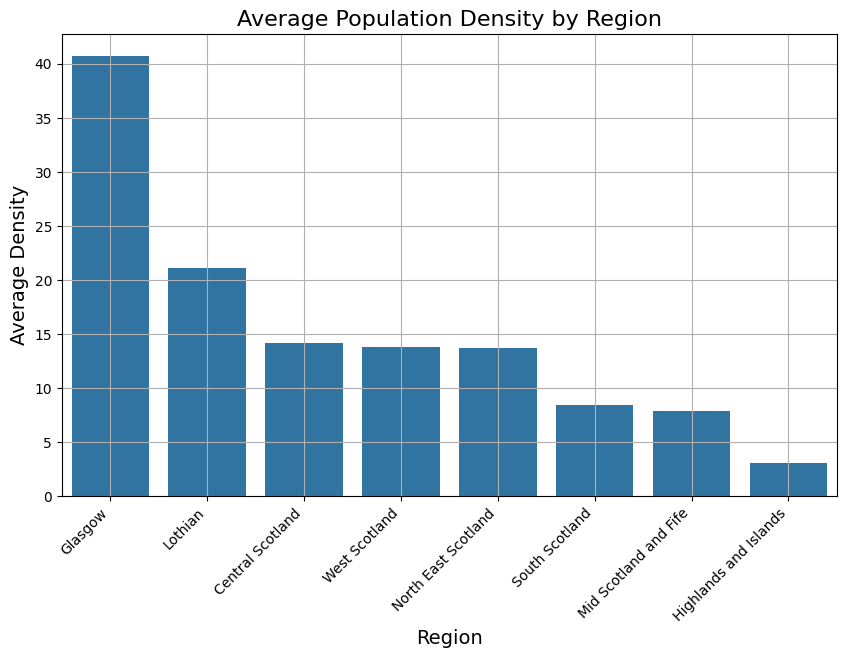

In [38]:
avg_density_by_region = pop_geo_filtered1.groupby('Region')['Density'].mean().reset_index()
avg_density_by_region = avg_density_by_region.sort_values(by='Density', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Density', data=avg_density_by_region)

plt.title('Average Population Density by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Average Density', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


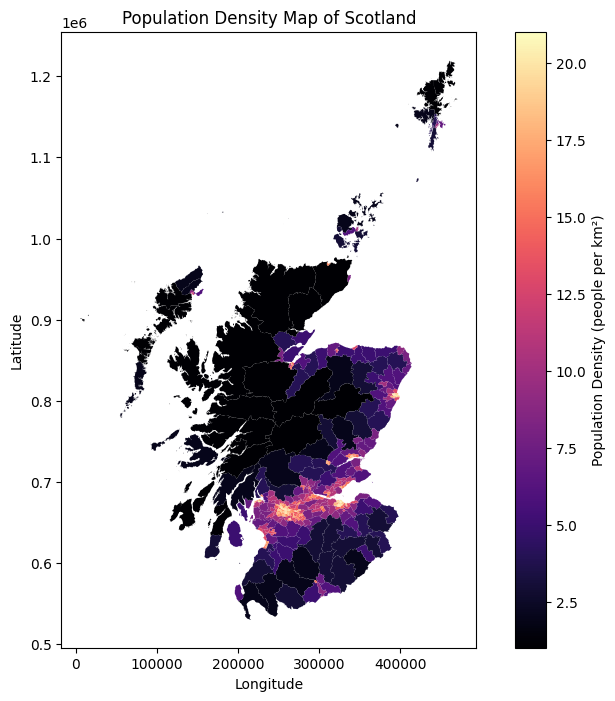

In [39]:
pop_geo = pop_geo.to_crs(epsg=27700)

quantiles = np.percentile(pop_geo['Density'], [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
pop_geo['Density_bins'] = np.digitize(pop_geo['Density'], quantiles)

fig, ax = plt.subplots(figsize=(10, 8))

pop_geo.plot(column='Density_bins', ax=ax, legend=True,
             cmap='magma', legend_kwds={'label': "Population Density (people per km²)",
                                       'orientation': "vertical"})

plt.title('Population Density Map of Scotland')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()